In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, find_peaks_cwt
import peak_util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
predicted = '/scr-ssd/coconutrubenasmr/regnet/ckpt/exp30/ASMR_Addictive_Tapping_1_Hr_No_Talking-27-of-365.npy'
real = '/scr-ssd/coconutrubenasmr/regnet/ckpt/exp30/ASMR_Addictive_Tapping_1_Hr_No_Talking-27-of-365_gt.npy'
p_arr = np.load(predicted)
r_arr = np.load(real)
print(p_arr.shape)

(80, 1720)


[0.00102814 0.00095729 0.00083707 ... 0.01998936 0.01497465 0.01260754]


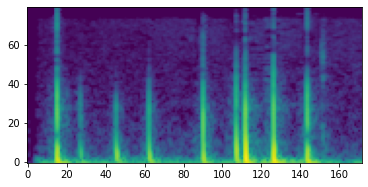

In [6]:
print(np.sum(np.exp(r_arr),axis=0))
height = np.max(np.exp(r_arr))*0.5
peaks0, _ = find_peaks(np.sum(np.exp(r_arr), axis=0), height=height, width=2)
_, peaks = peak_util.count_peaks(r_arr)
section = 1
plt.imshow(r_arr[:,(section-1)*172:section*172], origin='lower')

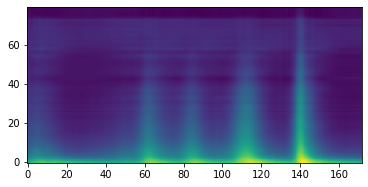

In [20]:
plt.imshow(p_arr[:,(section-1)*172:section*172], origin='lower')

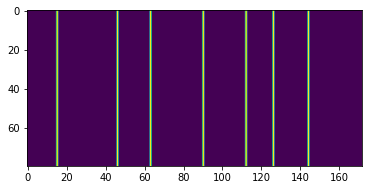

In [22]:
pimage = np.zeros(r_arr.shape)
pimage[:,peaks] = 1.
#pimage[:,peaks-1] = 1.
#pimage[:,peaks+1] = 1.
plt.imshow(pimage[:,(section-1)*172:section*172])

[0.01005845 0.01085567 0.01347746 ... 0.02111058 0.02023693 0.01916283]
[   6   64   86  114  142  187  224  238  252  304  322  337  373  411
  433  448  498  538  554  597  655  691  711  756  829  850  912  930
  954  970 1012 1032 1080 1115 1138 1171 1186 1208 1235 1261 1299 1315
 1331 1356 1378 1396 1436 1453 1475 1509 1555 1630 1652 1690 1710]


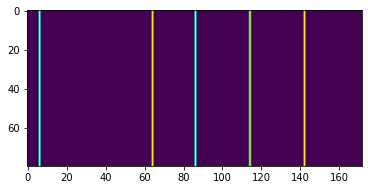

In [28]:
print(np.sum(np.exp(p_arr),axis=0))
height = np.max(np.exp(r_arr))*0.5
peaks0 = find_peaks_cwt(np.sum(np.exp(p_arr), axis=0), widths=np.arange(3,8))
print(peaks0)
section = 1
pimage = np.zeros(r_arr.shape)
pimage[:,peaks0] = 1.
#pimage[:,peaks-1] = 1.
#pimage[:,peaks+1] = 1.
plt.imshow(pimage[:,(section-1)*172:section*172])

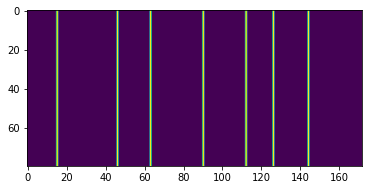

In [92]:
pimage = np.zeros(r_arr.shape)
pimage[:,peaks0] = 1.
#pimage[:,peaks-1] = 1.
#pimage[:,peaks+1] = 1.
plt.imshow(pimage[:,(section-1)*172:section*172])

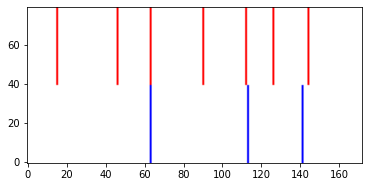

In [97]:
_, pred_peaks = peak_util.count_peaks(p_arr)
_, gt_peaks = peak_util.count_peaks(r_arr)
h, w = r_arr.shape
plt.imshow(peak_util.peaks_diff_image(pred_peaks, gt_peaks, h, w)[:,(section-1)*172:section*172], origin='lower')

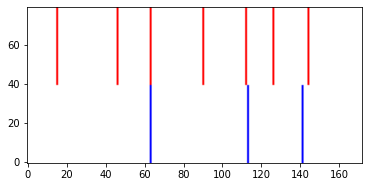

In [102]:
plt.imshow(peak_util.peaks_diff_image_from_mel(p_arr, r_arr)[:,(section-1)*172:section*172], origin='lower')